In [1]:
from configs.config_3x3_16_3x3_32_3x3_64_nc import config
from utils.dataset import MovingMNISTDataset
from utils.dataset_nc import NcDataset
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch.utils.data import DataLoader

c:\Users\liujj\miniconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\liujj\Documents\GitHub\ConvLSTM-prediction\.


In [2]:
vis_dataset = NcDataset(config)
vis_loader = DataLoader(vis_dataset, batch_size=5, 
                       num_workers=config.num_workers, shuffle=True, pin_memory=True)

Loaded 800 samples (train)


torch.Size([5, 6, 1, 64, 64]) torch.Size([5, 6, 1, 64, 64]) tensor(4.2553, device='cuda:0') tensor(-0.0500, device='cuda:0')


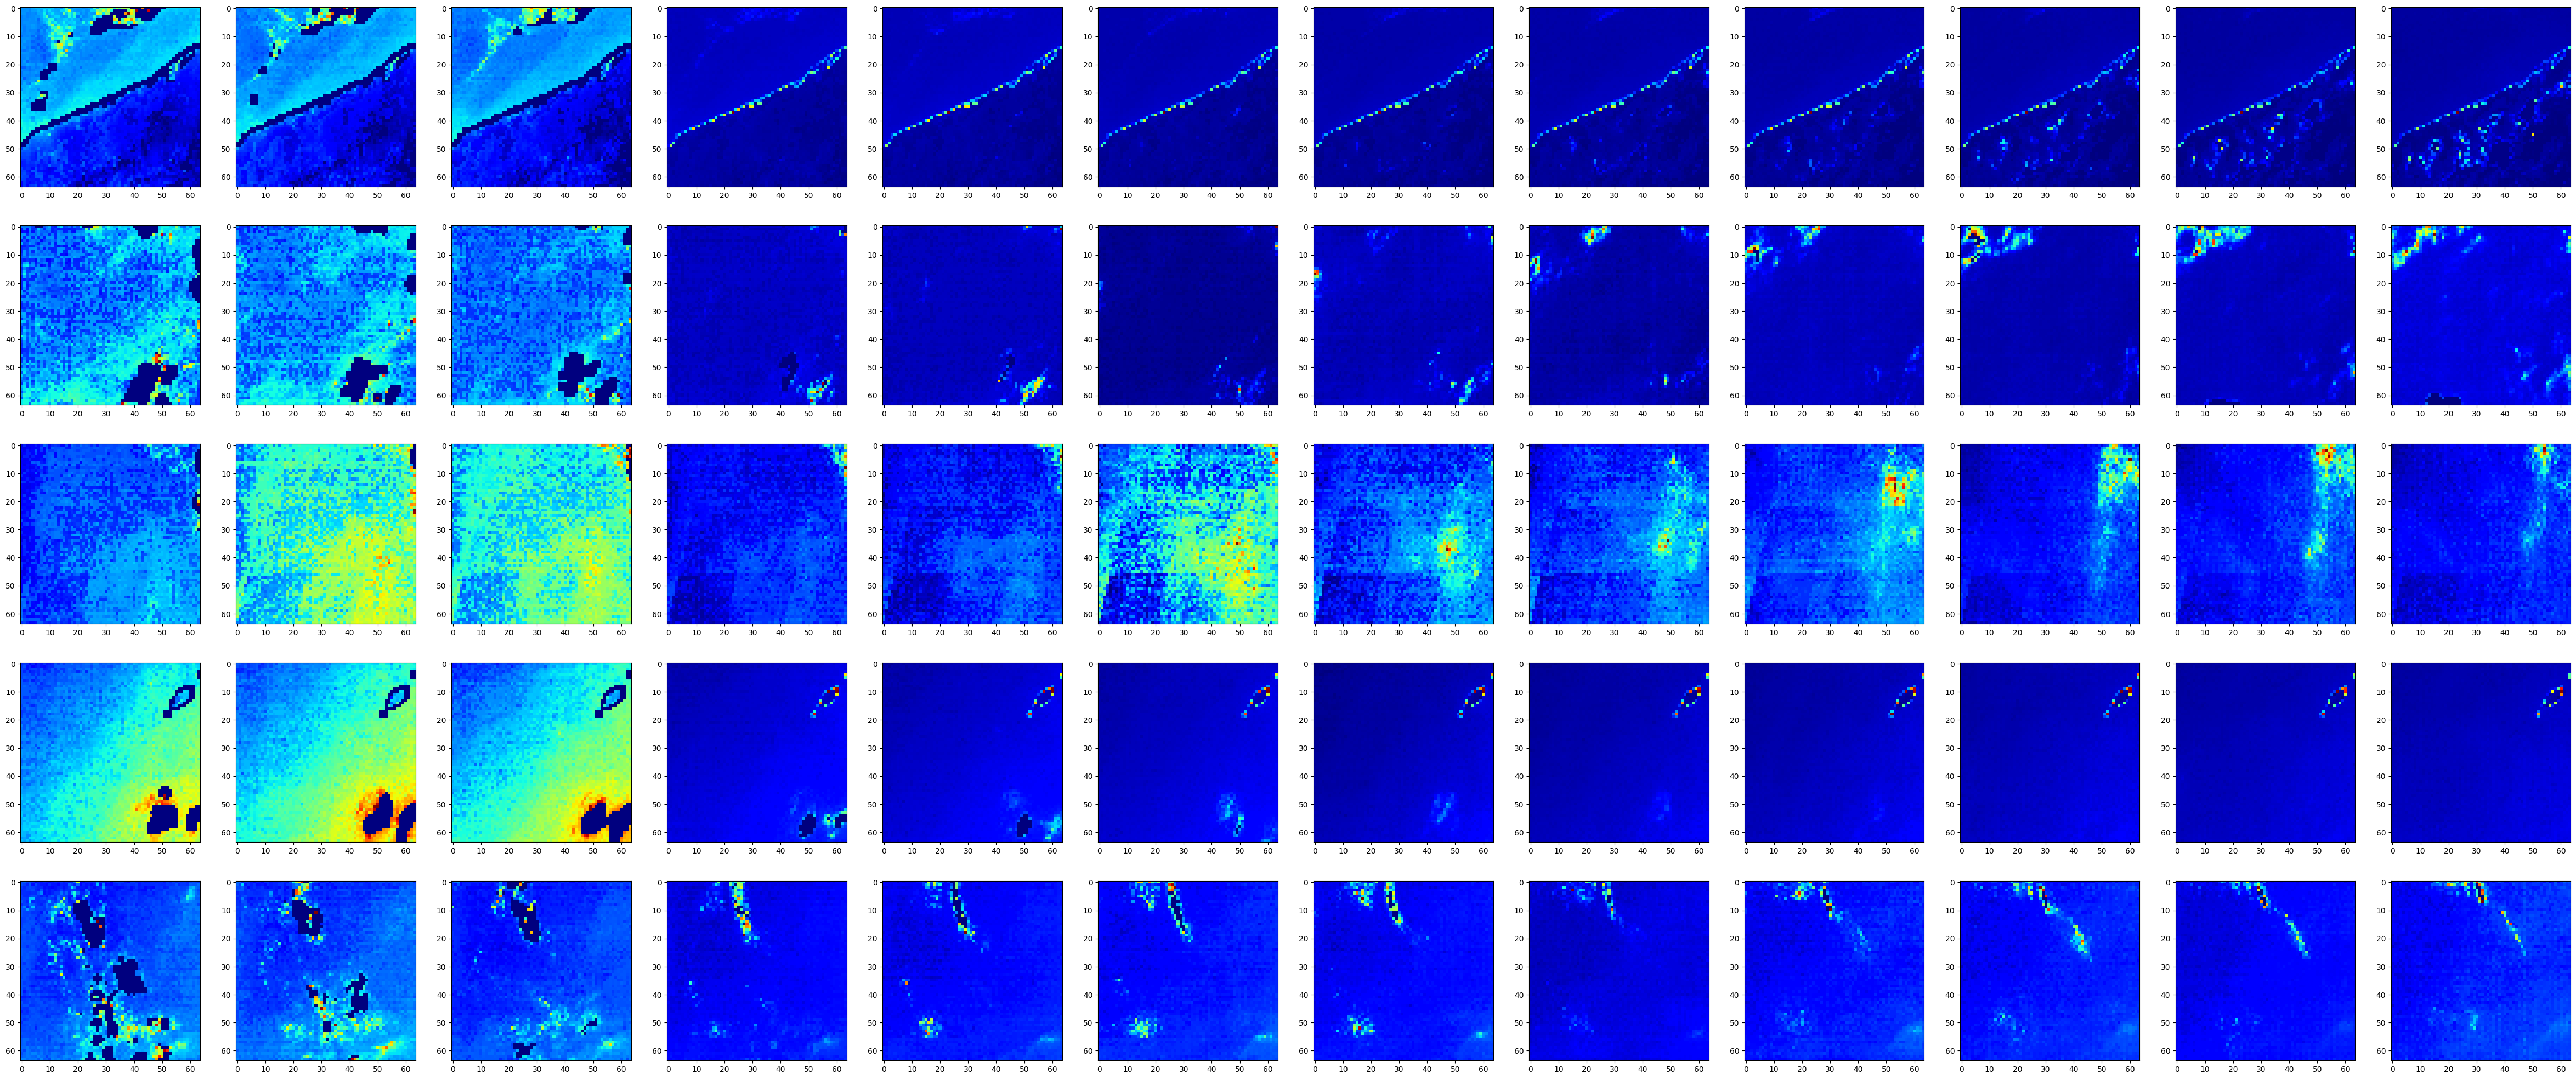

In [3]:
import numpy as np
for batch_idx, (inputs, targets) in enumerate(vis_loader):
    inputs = inputs.float().to(config.device)
    targets = targets.float().to(config.device)
    print(inputs.shape, targets.shape, inputs.max(), inputs.min())
    images = torch.cat([inputs, targets], dim=1)
    _, axarr = plt.subplots(images.shape[0], images.shape[1], figsize=(images.shape[1]*5, images.shape[0]*5))
    for b in range(images.shape[0]):
        for n in range(images.shape[1]):
            plot_img = images[b, n, 0].cpu().numpy()
            axarr[b][n].imshow(np.flip(plot_img, axis=0), cmap='jet')
    break